In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from Functions import *

In [4]:
df = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [5]:
df2 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau_balance.csv")
df2.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
merge_table = pd.merge(df, df2, how= 'left', on=['SK_ID_BUREAU'])
merge_table.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR,MONTHS_BALANCE,STATUS
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629,NaN,NaN
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629,NaN,NaN
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629,NaN,NaN
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629,NaN,NaN
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629,NaN,NaN


### Chuyển ngày thành năm

In [7]:
df['DAYS_CREDIT_ENDDATE'][merge_table['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
df['DAYS_ENDDATE_FACT'][merge_table['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
df['DAYS_CREDIT_UPDATE'][merge_table['DAYS_CREDIT_UPDATE'] > -50*365] = np.nan

# Pre check overall Dataframe

In [8]:
merge_check = pre_check_tool(merge_table)
merge_check.split_data()

In [9]:
# Check null percent
merge_check.check_per_null()

,number_missing,percent_missing
AMT_CREDIT_MAX_OVERDUE,11193586,71.554587
AMT_ANNUITY,6645572,42.481575
AMT_CREDIT_SUM_LIMIT,6327280,40.446905
DAYS_ENDDATE_FACT,3913484,25.016803
AMT_CREDIT_SUM_DEBT,2631461,16.821518
MONTHS_BALANCE,941810,6.020486
STATUS,941810,6.020486
DAYS_CREDIT_ENDDATE,785601,5.021926
AMT_CREDIT_SUM,3,0.000019


In [10]:
# find cols that have null > 90%
print(merge_check.find_null_cols(0.9))

Index([], dtype='object')


không cột nào có >90% null --> không drop

In [11]:
#duplicate check
merge_table.duplicated().sum()

0

In [12]:
# valid value
## Num data
merge_check.check_value_num()
print('\n\n\n')

## cat data
merge_check.check_value_cat()

SK_ID_BUREAU  has     >0 15643422,  =0 0  ,   <0 0,    nan: 0,   other values: 0
DAYS_CREDIT  has     >0 0,  =0 4  ,   <0 15643418,    nan: 0,   other values: 0
CREDIT_DAY_OVERDUE  has     >0 34861,  =0 15608561  ,   <0 0,    nan: 0,   other values: 0
DAYS_CREDIT_ENDDATE  has     >0 3708551,  =0 3905  ,   <0 11145365,    nan: 785601,   other values: 0
DAYS_ENDDATE_FACT  has     >0 0,  =0 147  ,   <0 11729791,    nan: 3913484,   other values: 0
AMT_CREDIT_MAX_OVERDUE  has     >0 1079390,  =0 3370446  ,   <0 0,    nan: 11193586,   other values: 0
CNT_CREDIT_PROLONG  has     >0 120432,  =0 15522990  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT_SUM  has     >0 15054740,  =0 588679  ,   <0 0,    nan: 3,   other values: 0
AMT_CREDIT_SUM_DEBT  has     >0 2511008,  =0 10466290  ,   <0 34663,    nan: 2631461,   other values: 0
AMT_CREDIT_SUM_LIMIT  has     >0 461161,  =0 8853668  ,   <0 1313,    nan: 6327280,   other values: 0
AMT_CREDIT_SUM_OVERDUE  has     >0 33988,  =0 15609434  ,   <0 

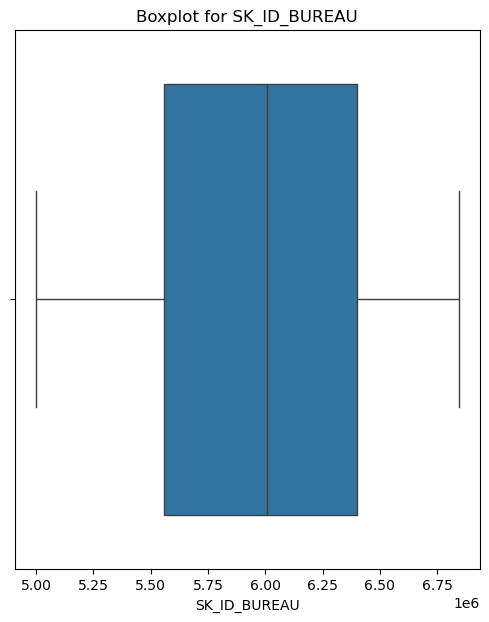

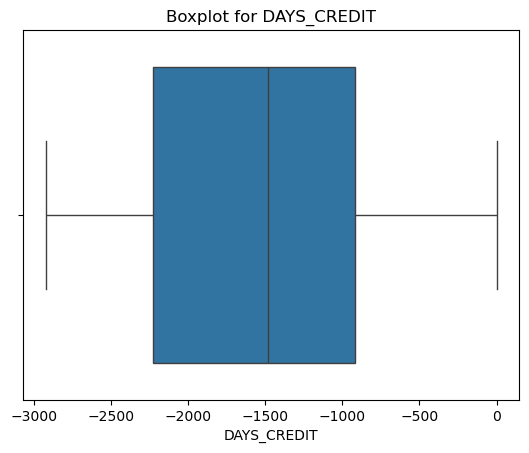

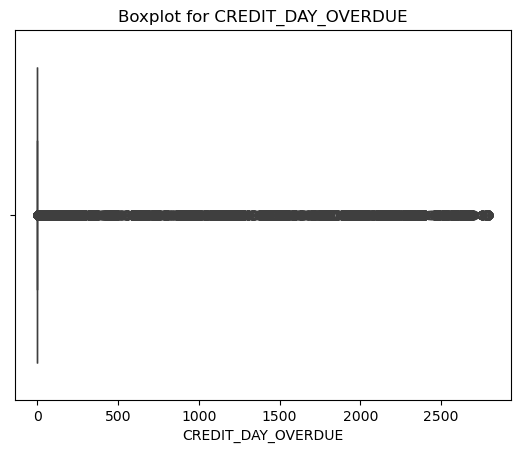

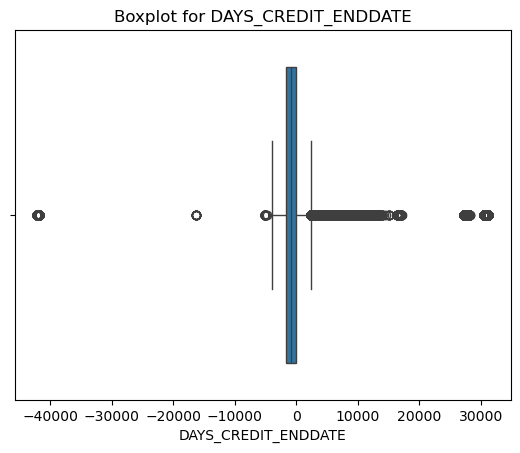

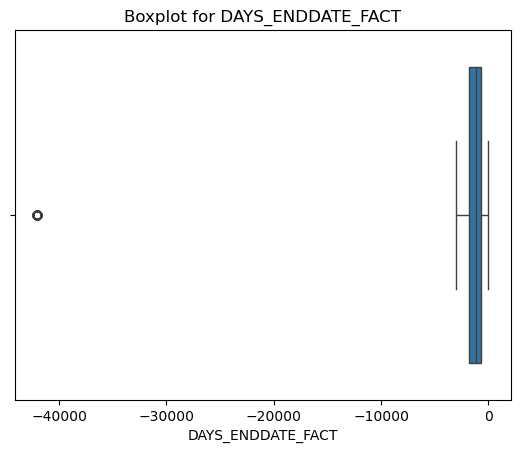

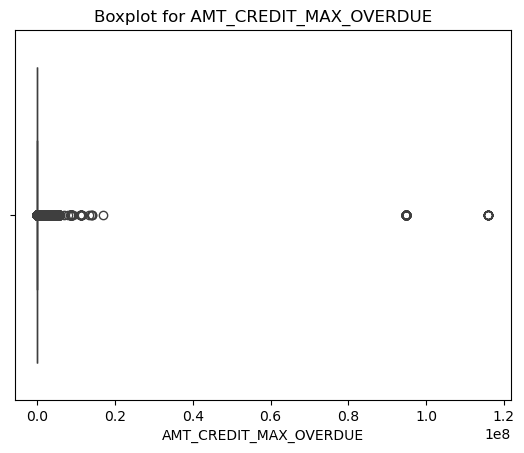

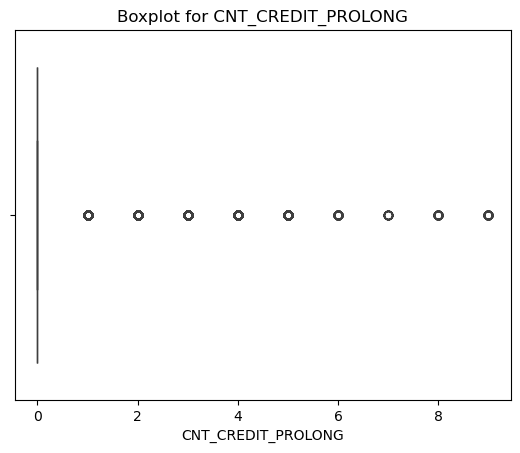

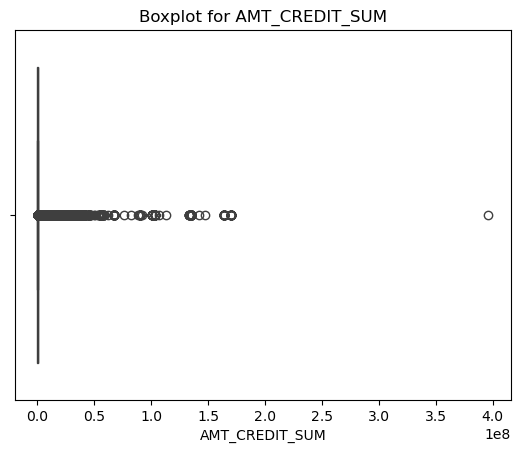

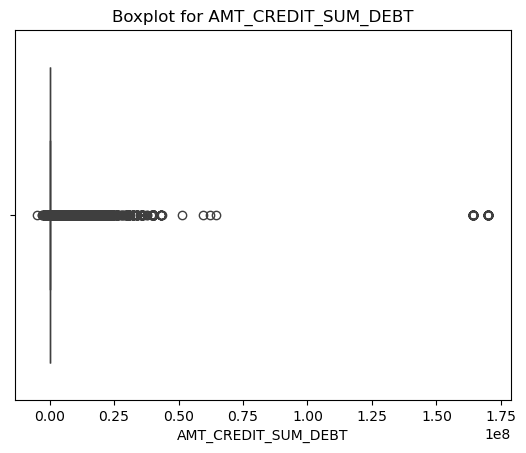

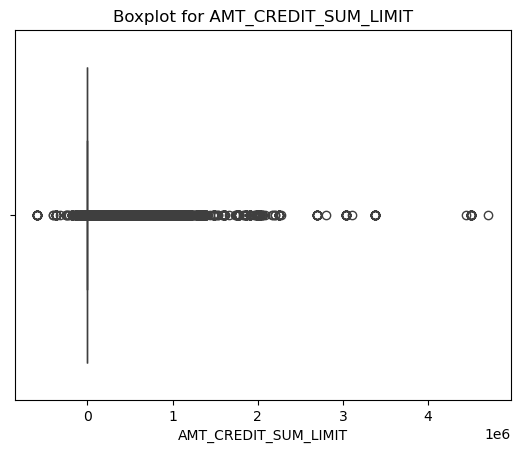

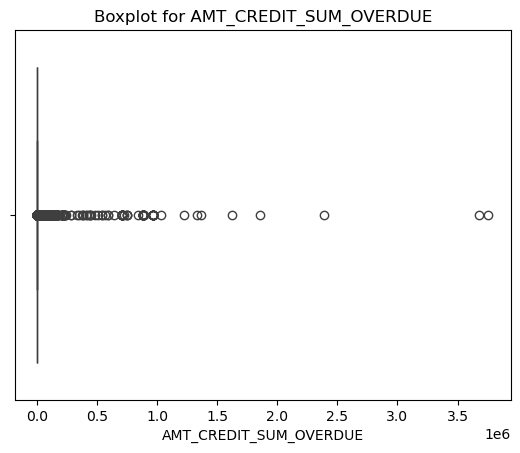

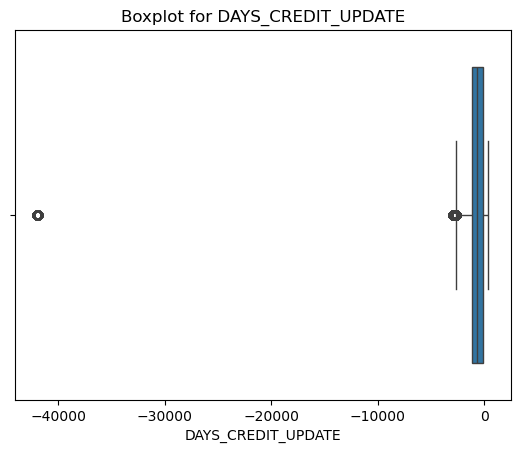

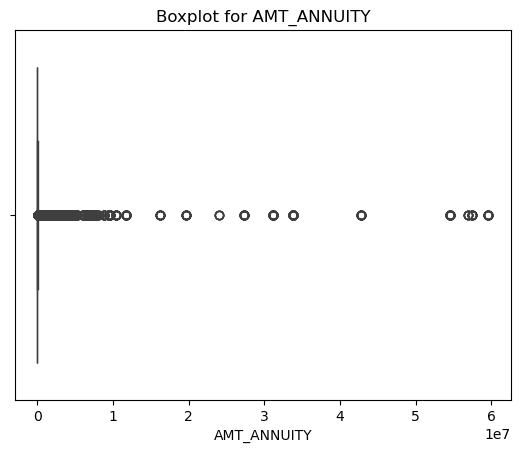

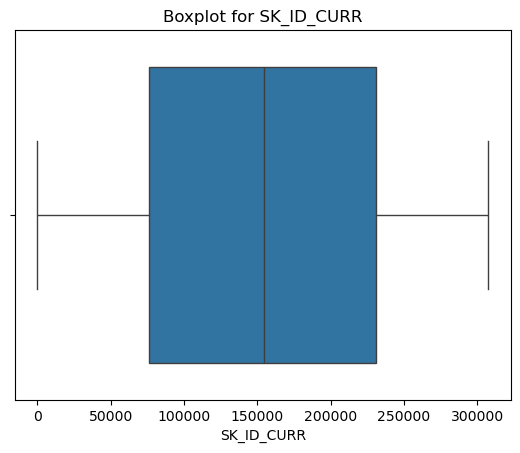

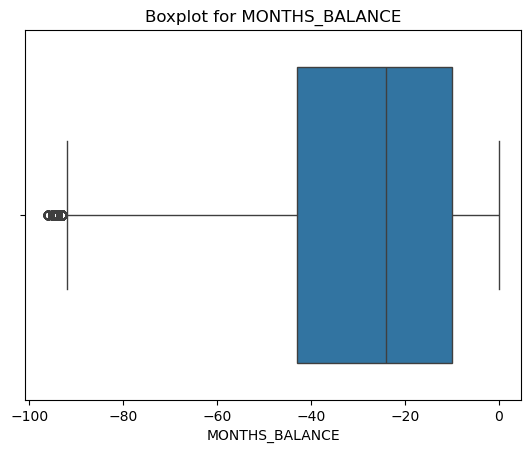

In [13]:
# Outliers 
merge_check.show_outliers()

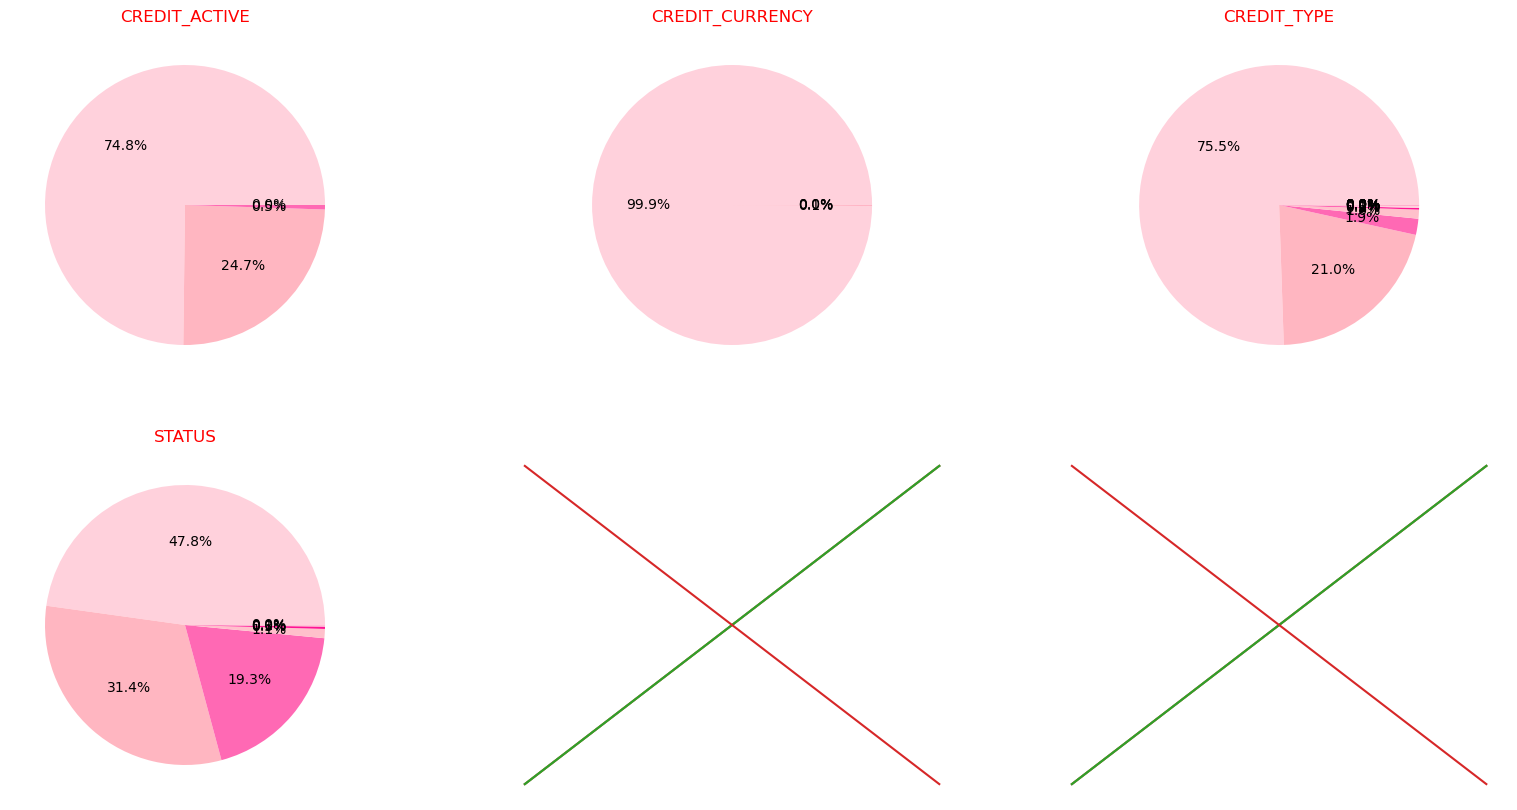

In [14]:
merge_check.dist_catchart()

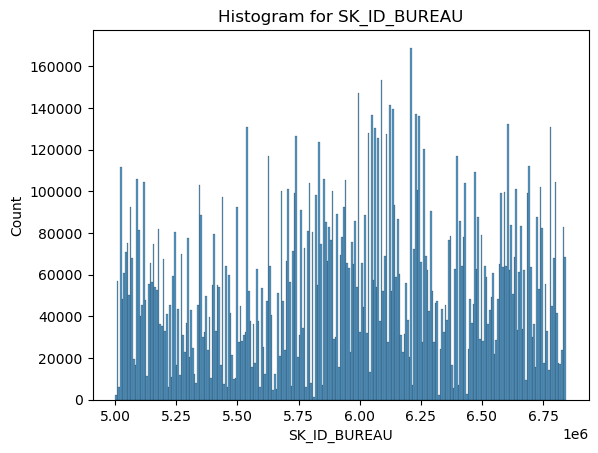

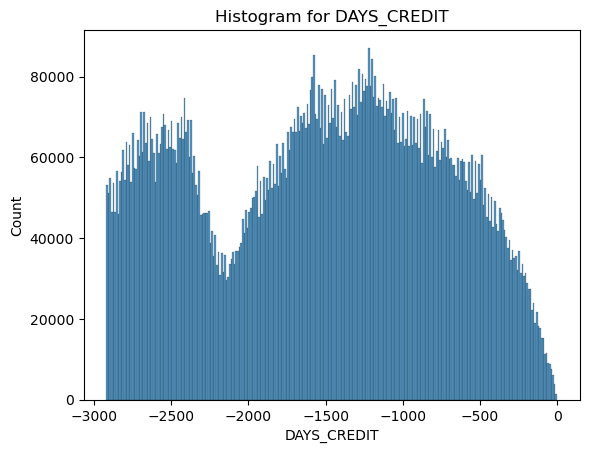

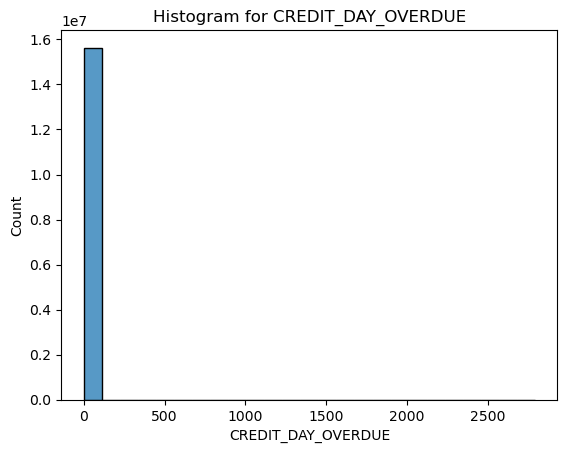

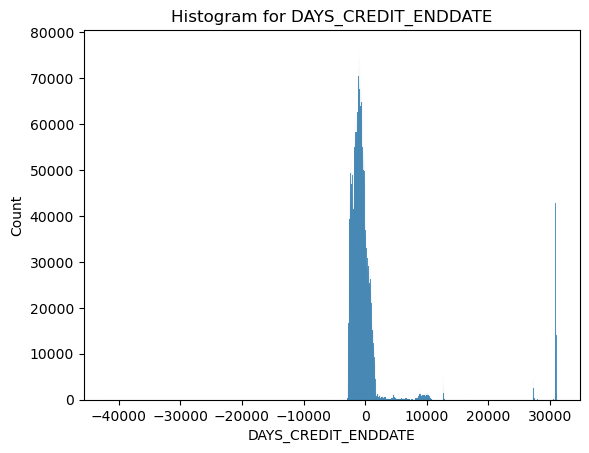

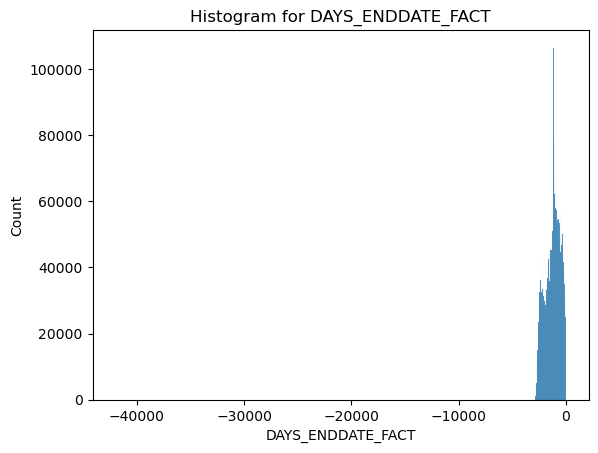

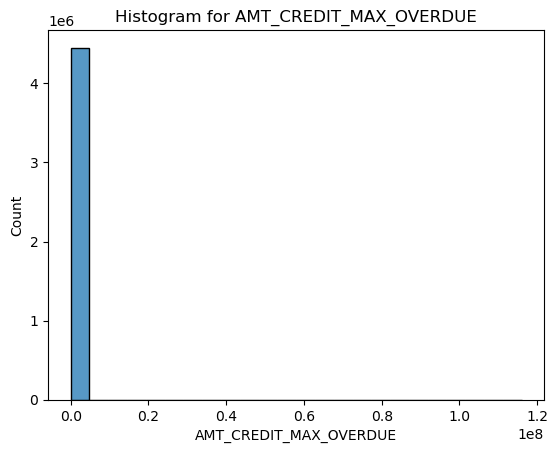

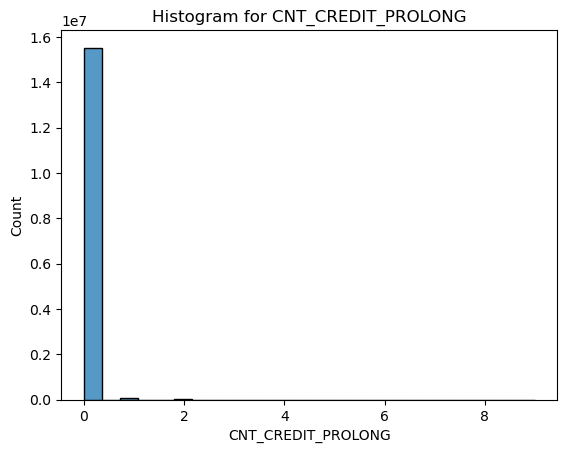

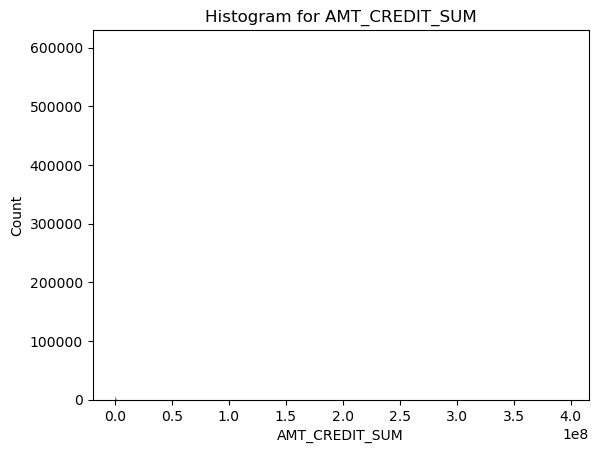

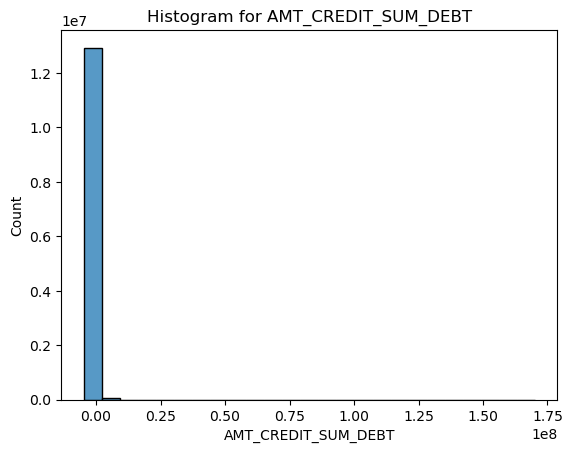

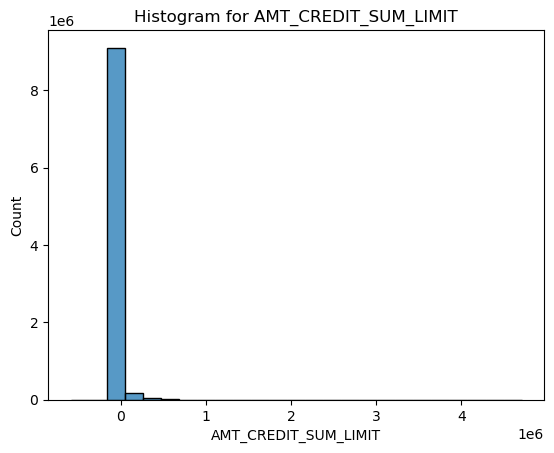

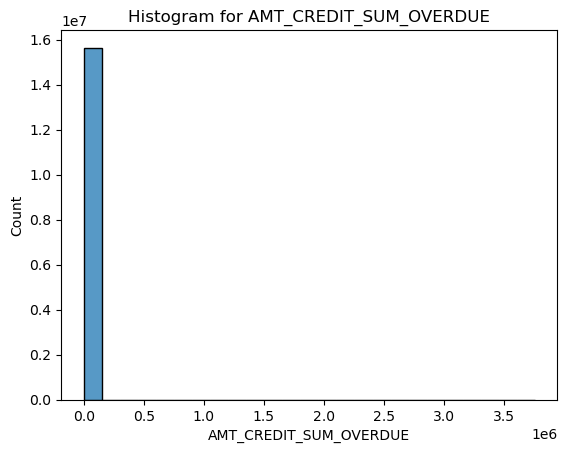

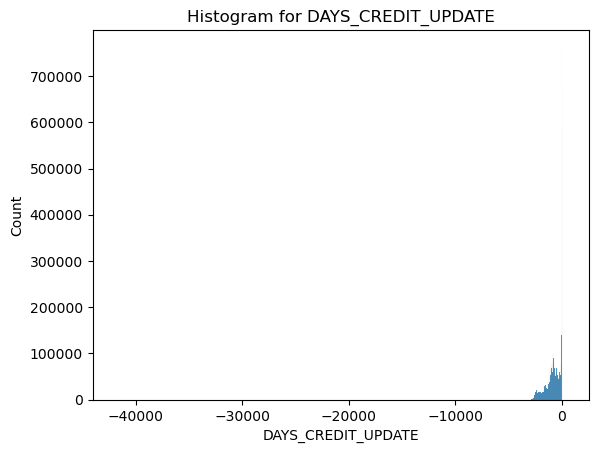

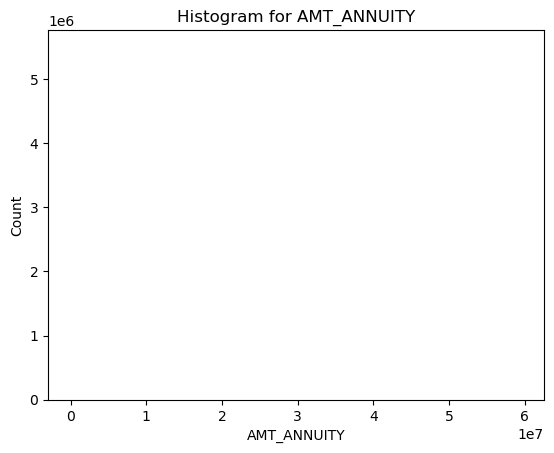

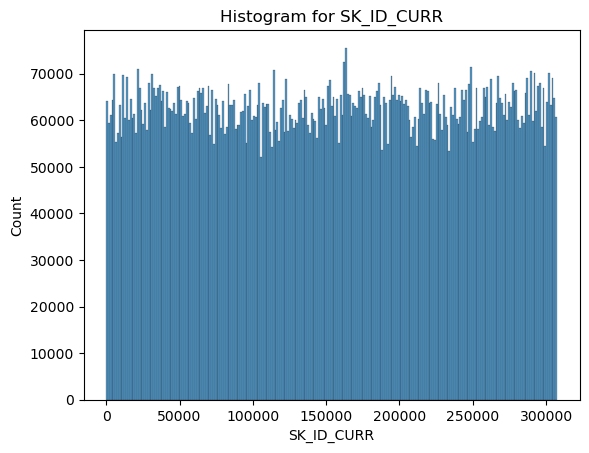

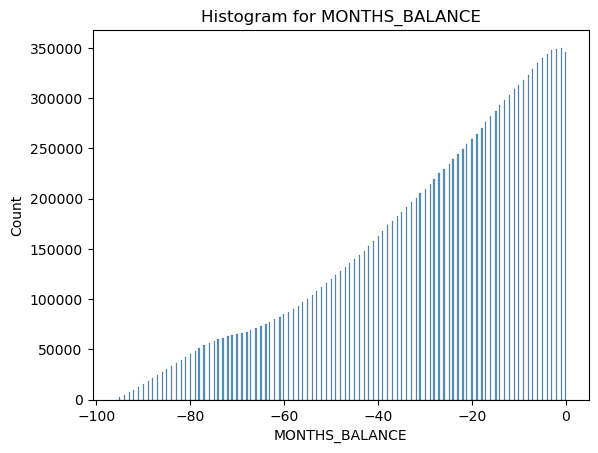

In [15]:
merge_check.dist_numchart()

# EDA Internal

## Univariate Analysis

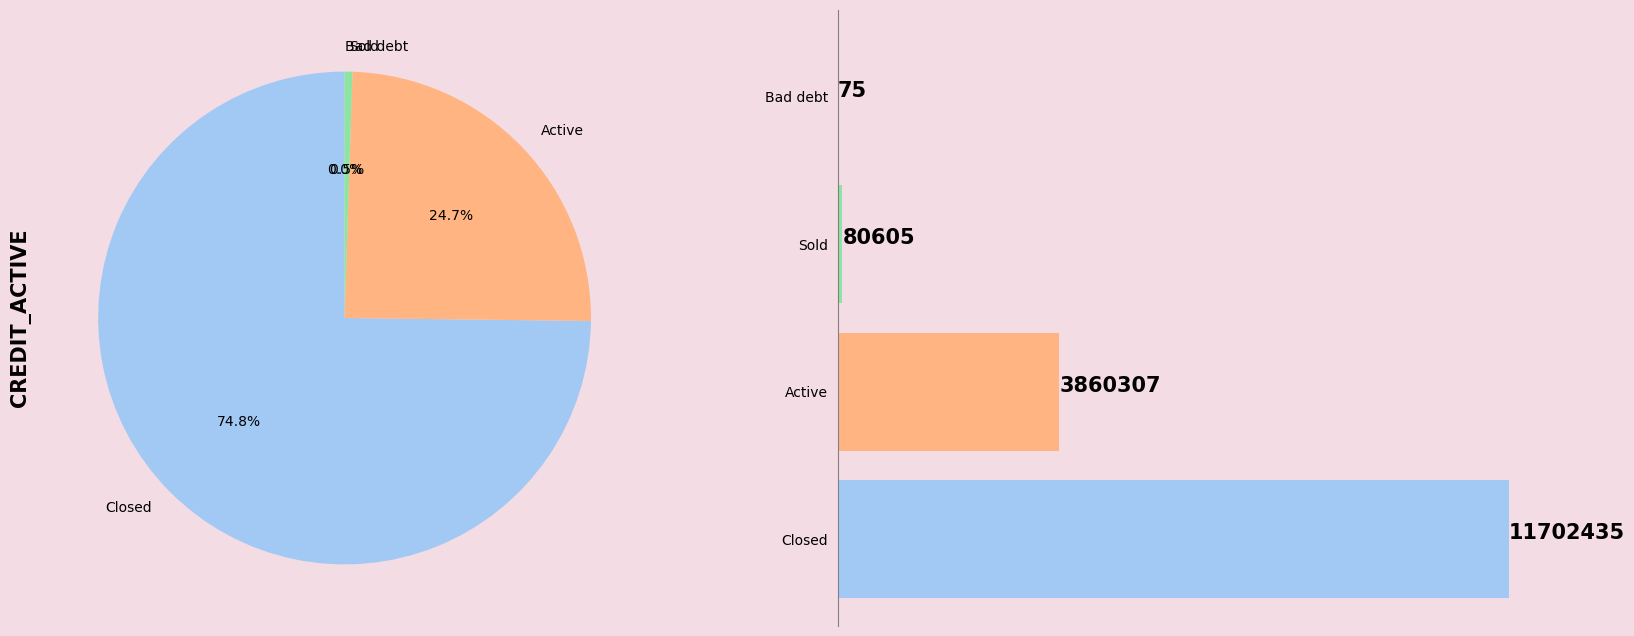

In [16]:
obj1 = Univariate_Analysis(df= merge_table, col= 'CREDIT_ACTIVE', num= False)
obj1.visualize()

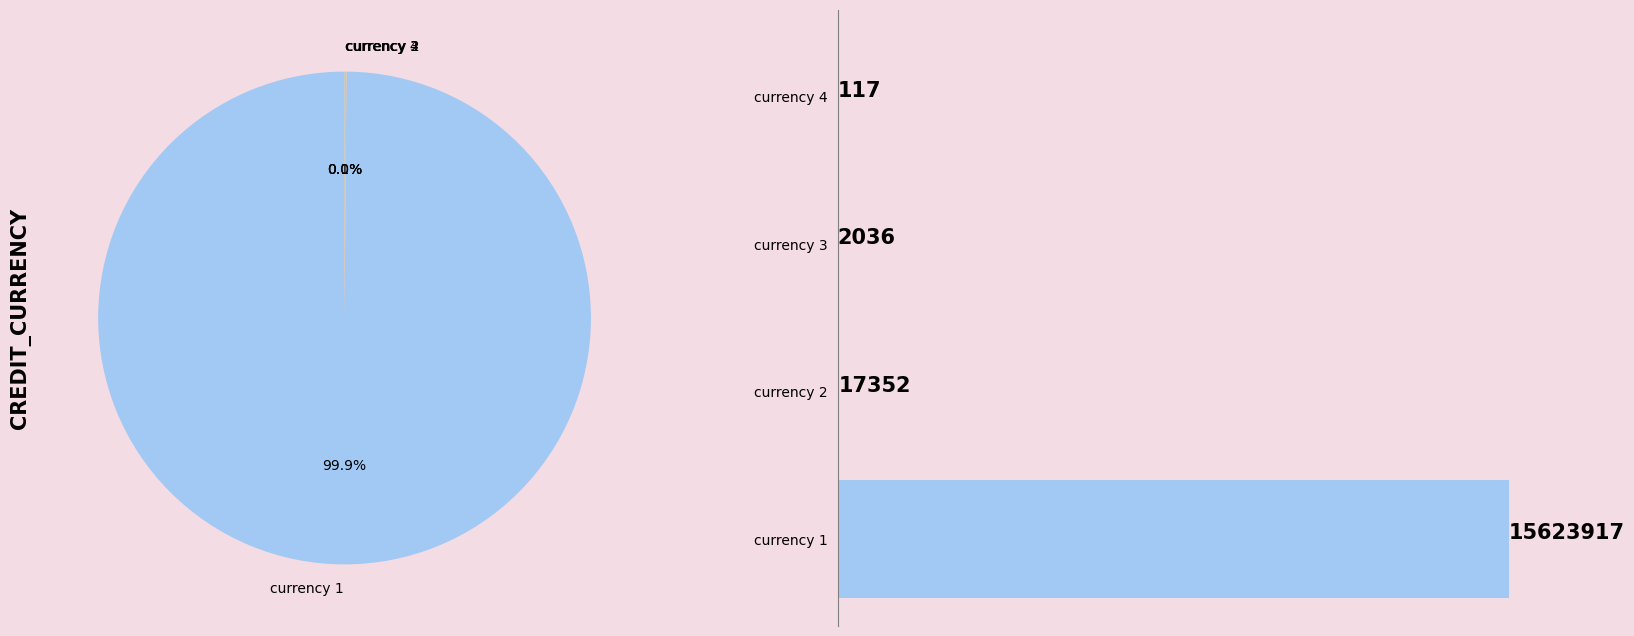

In [17]:
obj2 = Univariate_Analysis(df= merge_table, col= 'CREDIT_CURRENCY', num= False)
obj2.visualize()

+ The majority of currency is currency 1 with 99.9%

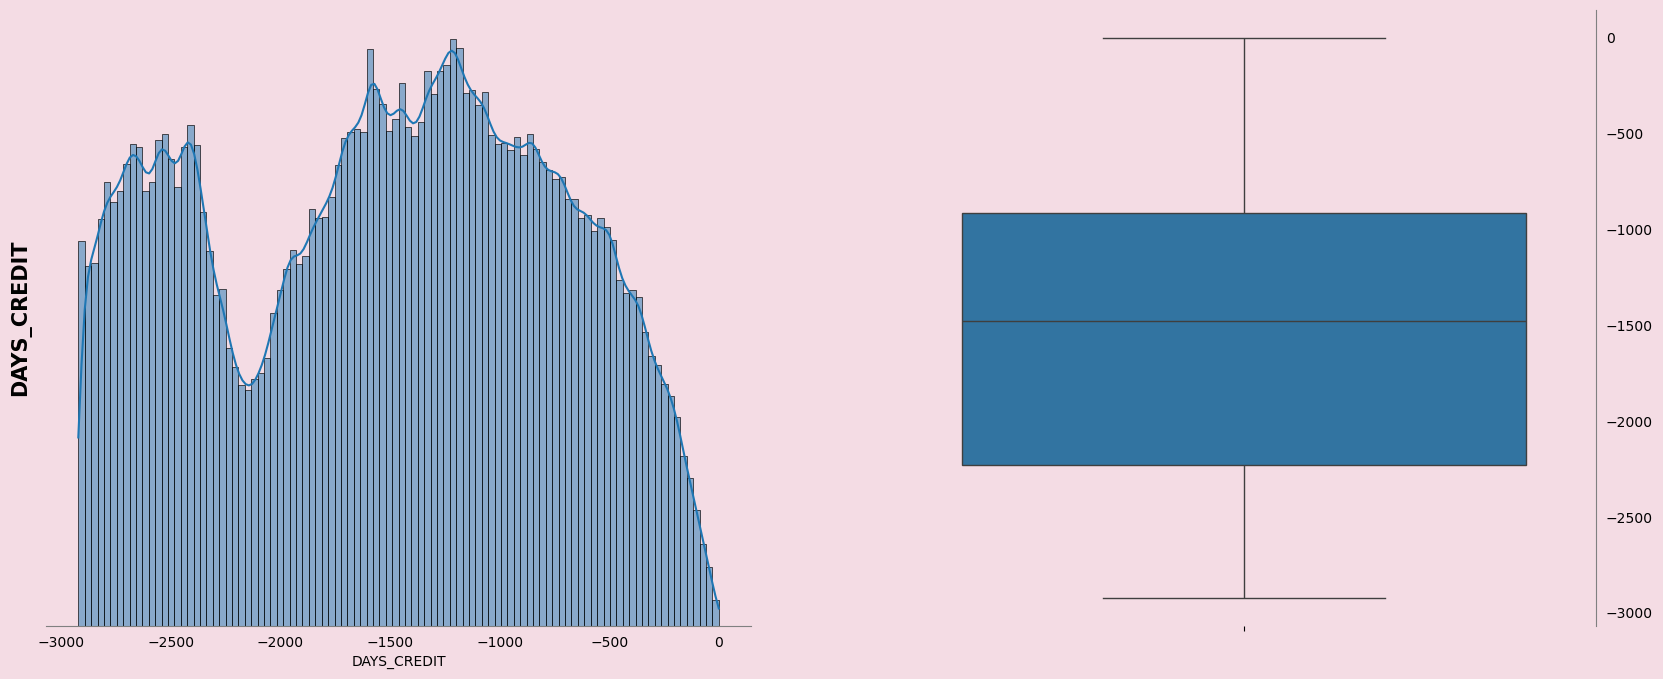

In [18]:
obj3 = Univariate_Analysis(df= merge_table, col= 'DAYS_CREDIT', num= True)
obj3.visualize()

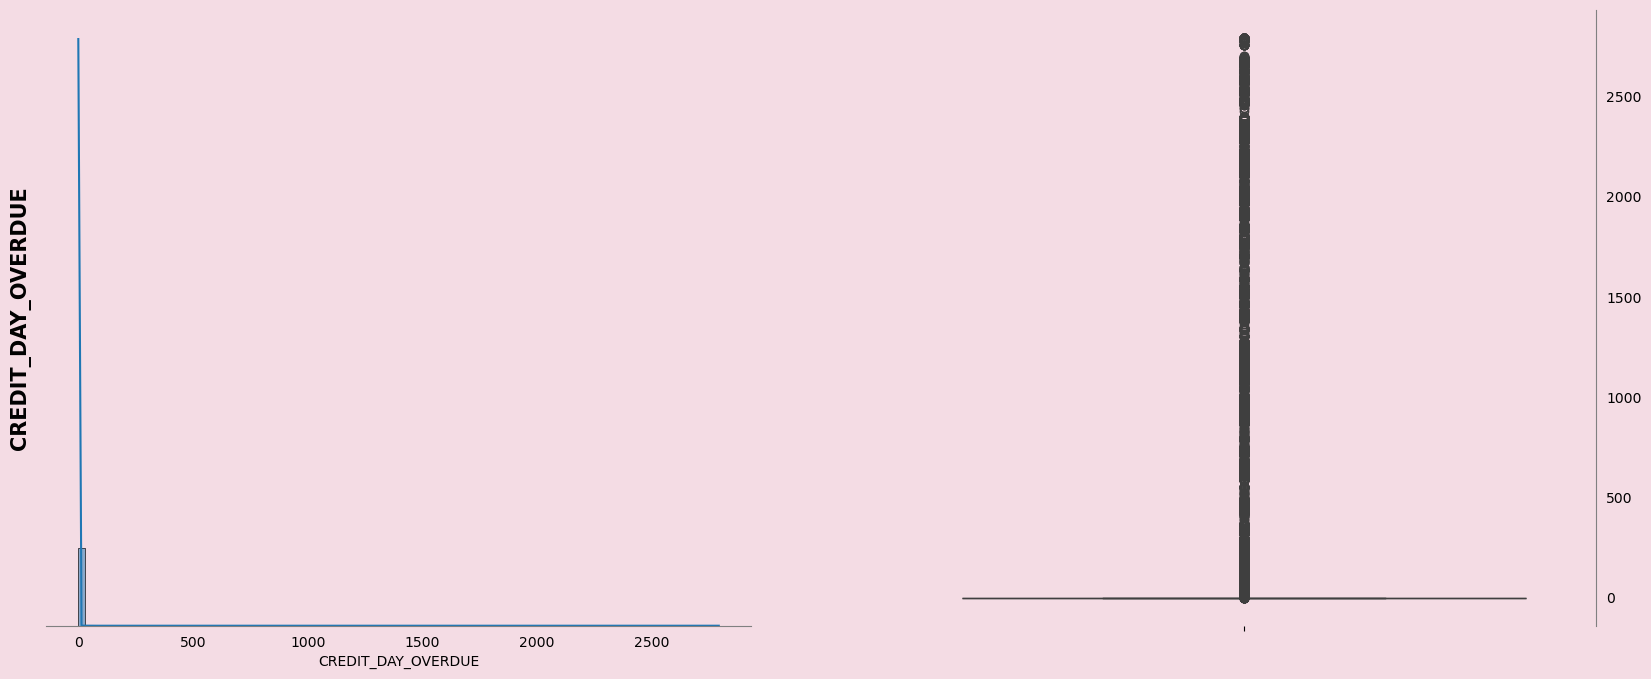

In [19]:
obj4 = Univariate_Analysis(df= merge_table, col= 'CREDIT_DAY_OVERDUE', num= True)
obj4.visualize()

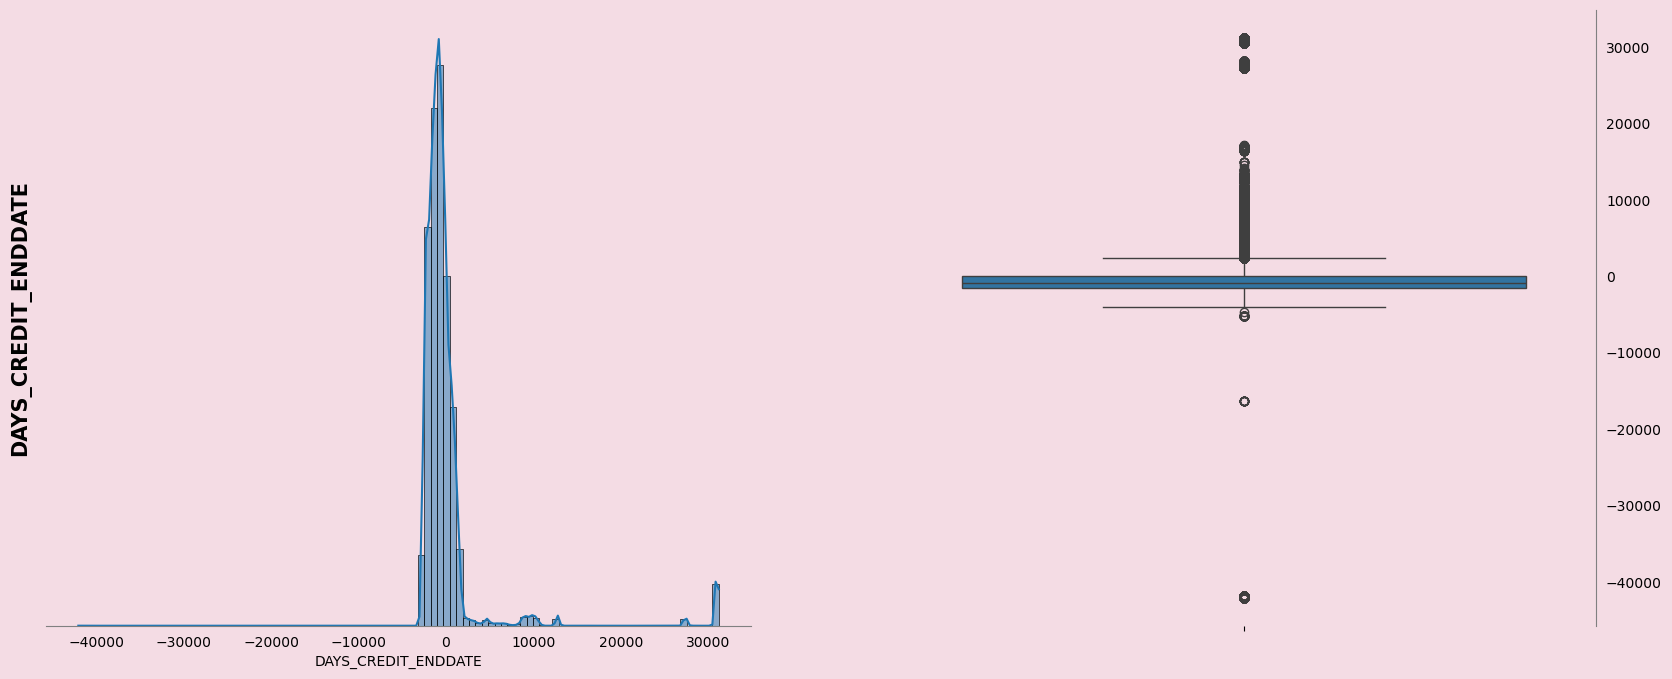

In [20]:
obj5 = Univariate_Analysis(df= merge_table, col= 'DAYS_CREDIT_ENDDATE', num= True)
obj5.visualize()

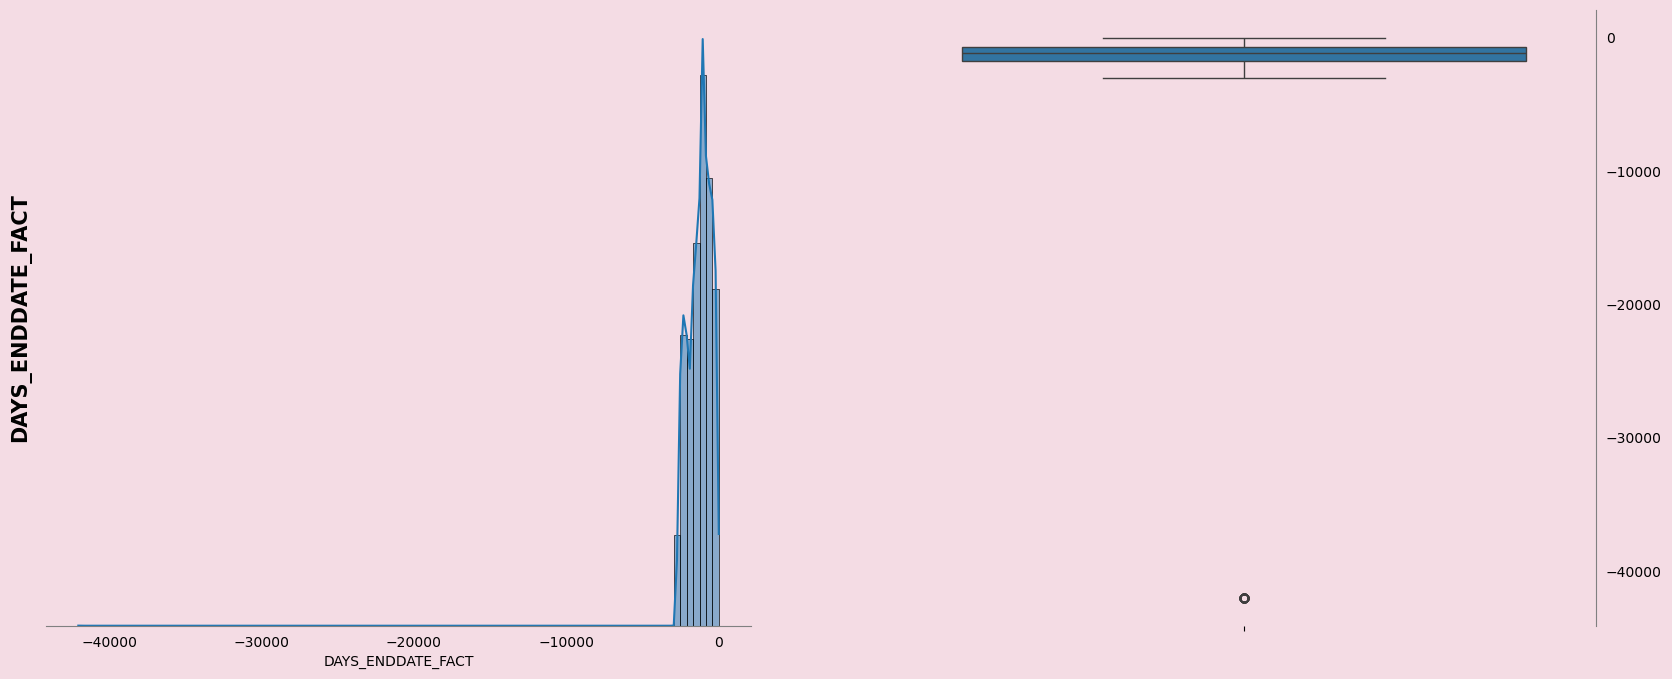

In [21]:
obj6 = Univariate_Analysis(df= merge_table, col= 'DAYS_ENDDATE_FACT', num= True)
obj6.visualize()

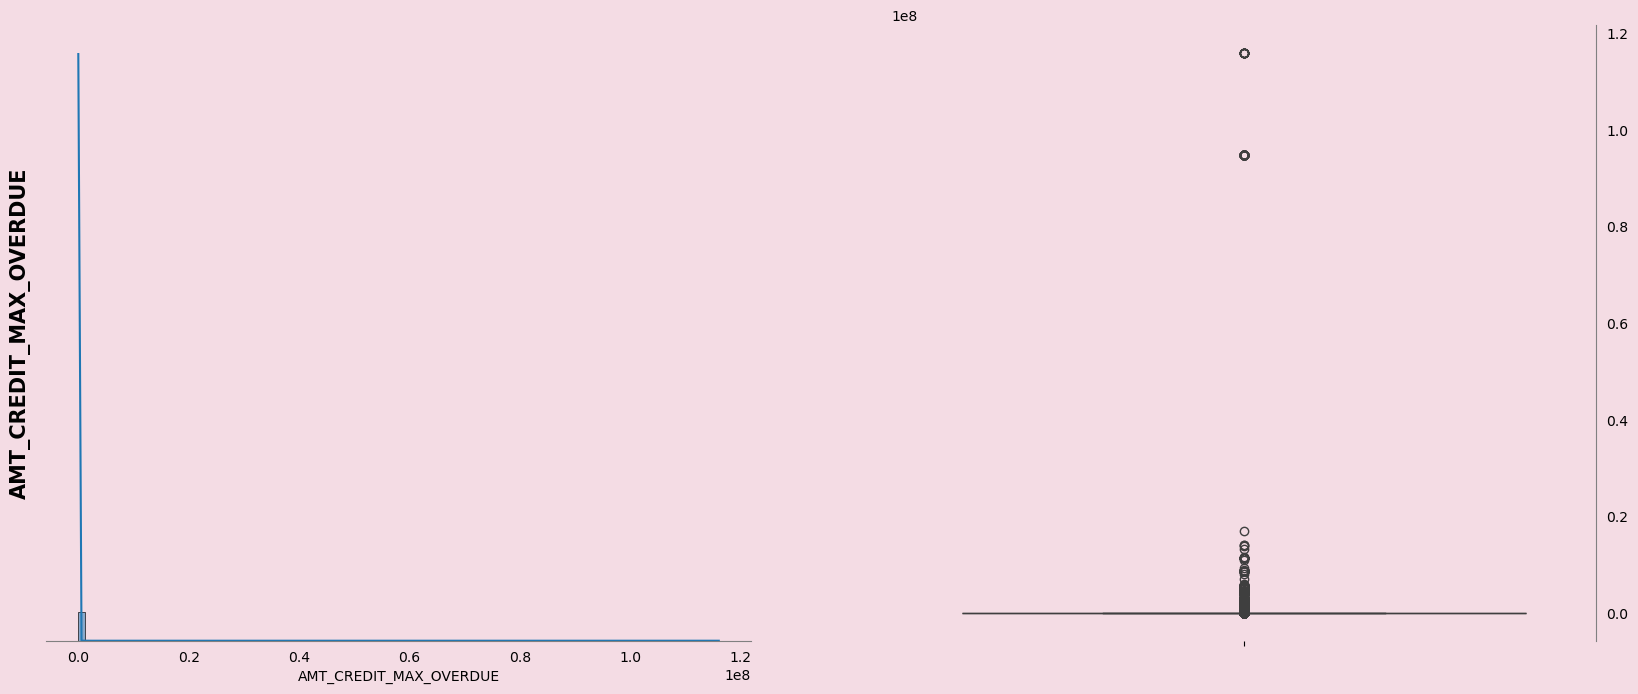

In [22]:
obj7 = Univariate_Analysis(df= merge_table, col= 'AMT_CREDIT_MAX_OVERDUE', num= True)
obj7.visualize()

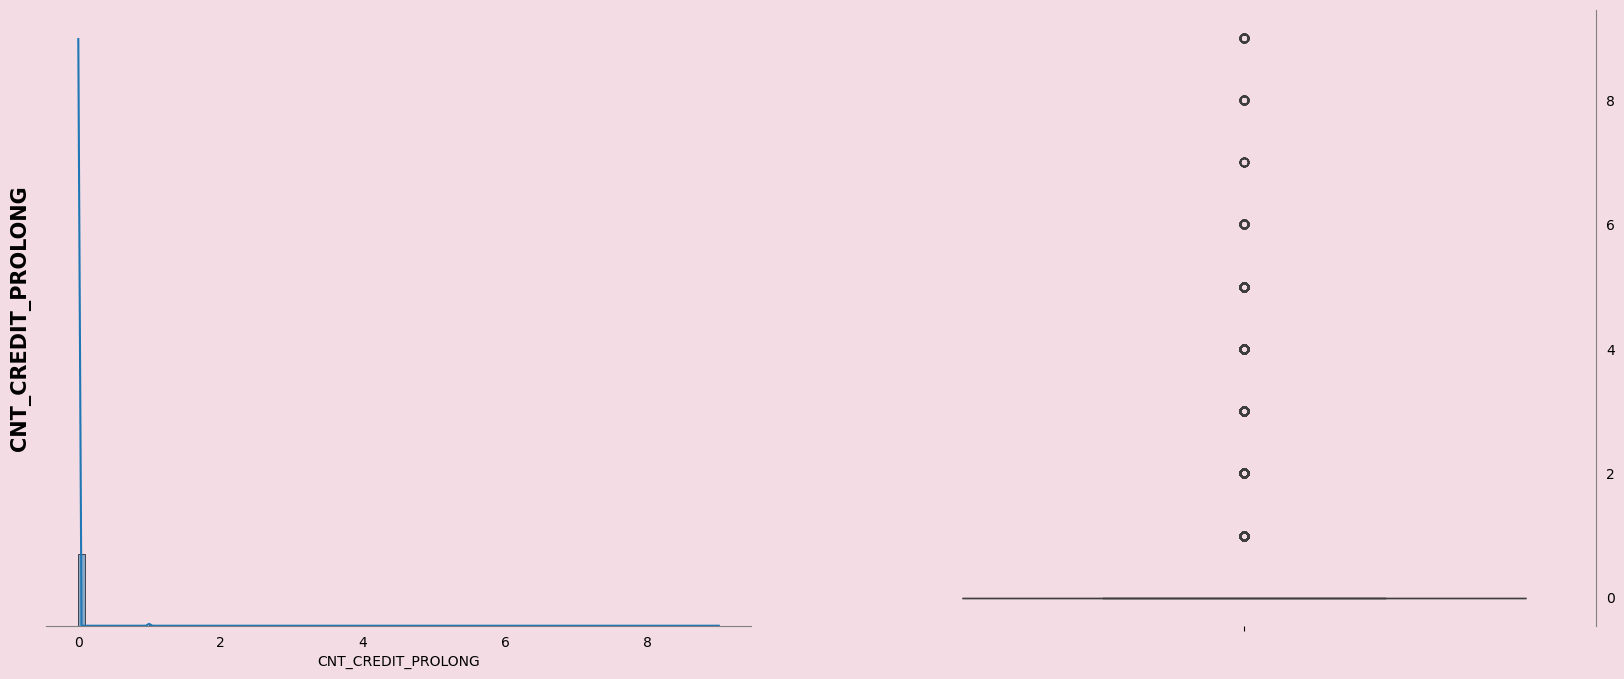

In [23]:
obj8 = Univariate_Analysis(df= merge_table, col= 'CNT_CREDIT_PROLONG', num= True)
obj8.visualize()

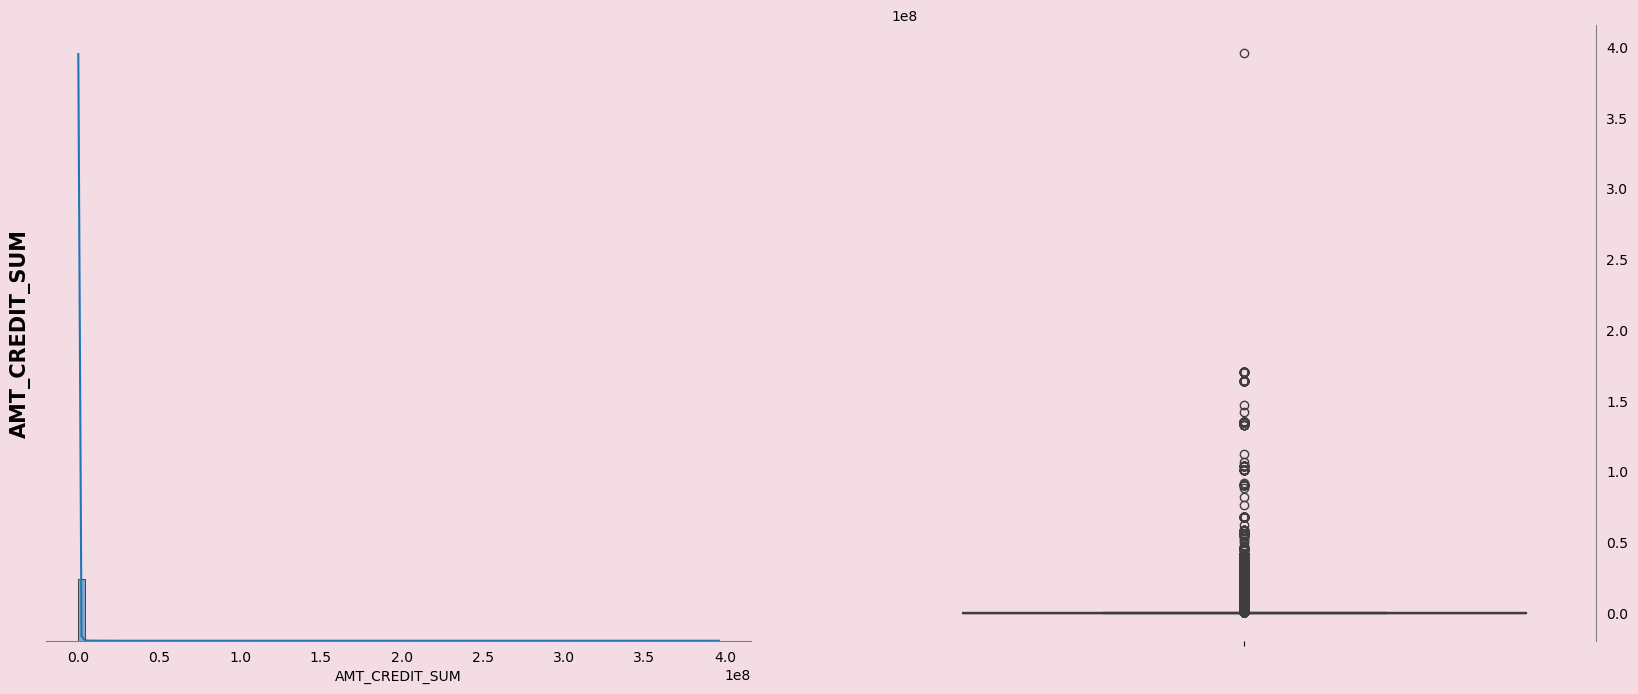

In [24]:
obj9 = Univariate_Analysis(df= merge_table, col= 'AMT_CREDIT_SUM', num= True)
obj9.visualize()

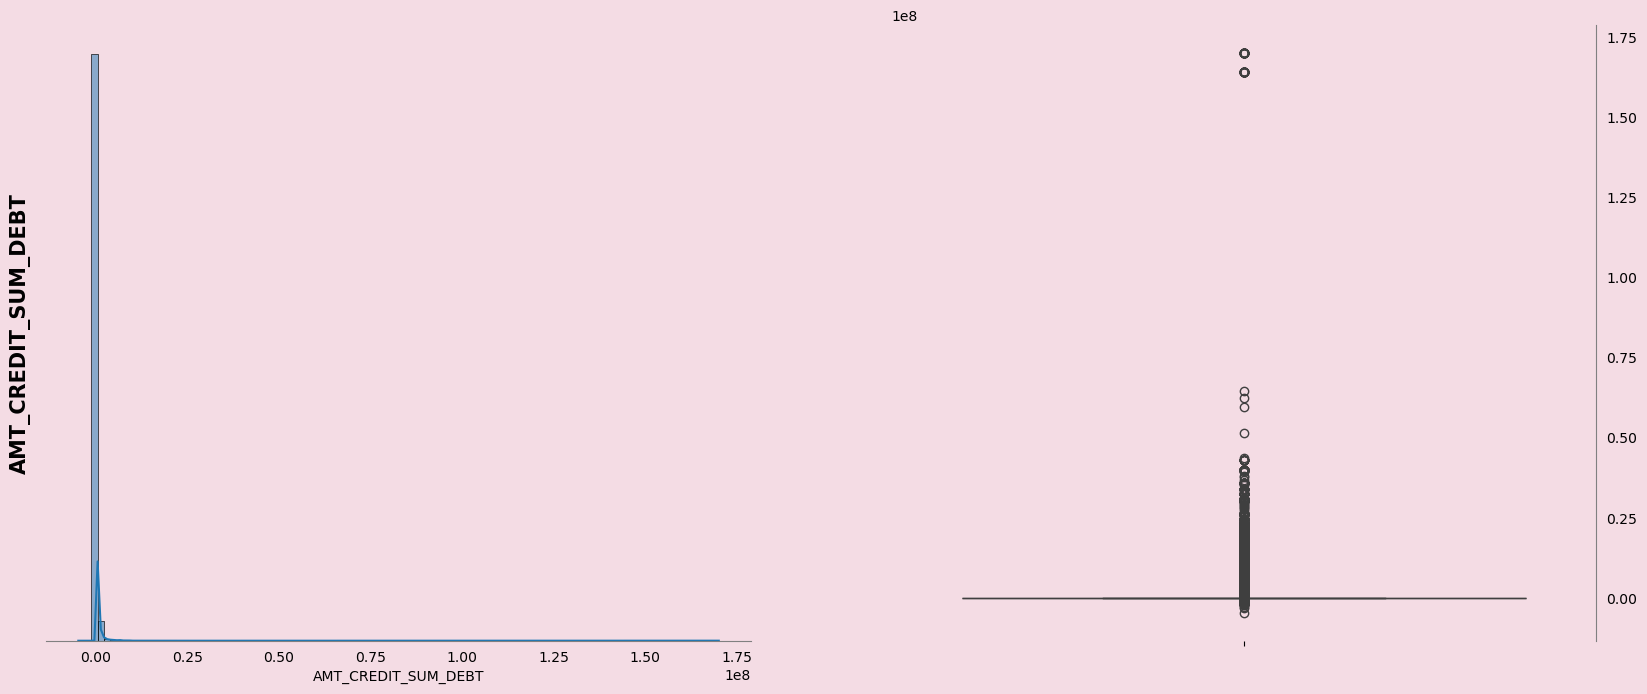

In [25]:
obj10 = Univariate_Analysis(df= merge_table, col= 'AMT_CREDIT_SUM_DEBT', num= True)
obj10.visualize()

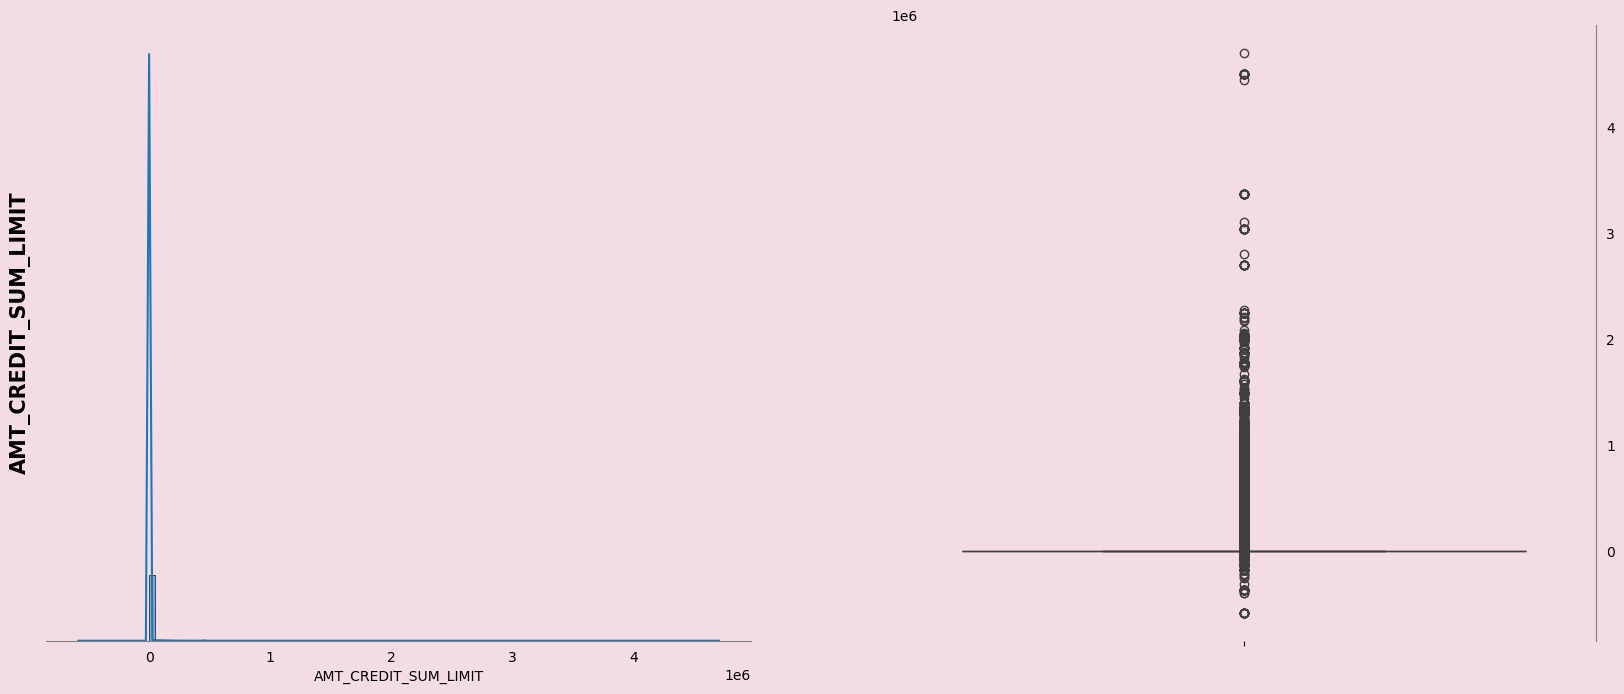

In [26]:
obj11 = Univariate_Analysis(df= merge_table, col= 'AMT_CREDIT_SUM_LIMIT', num= True)
obj11.visualize()

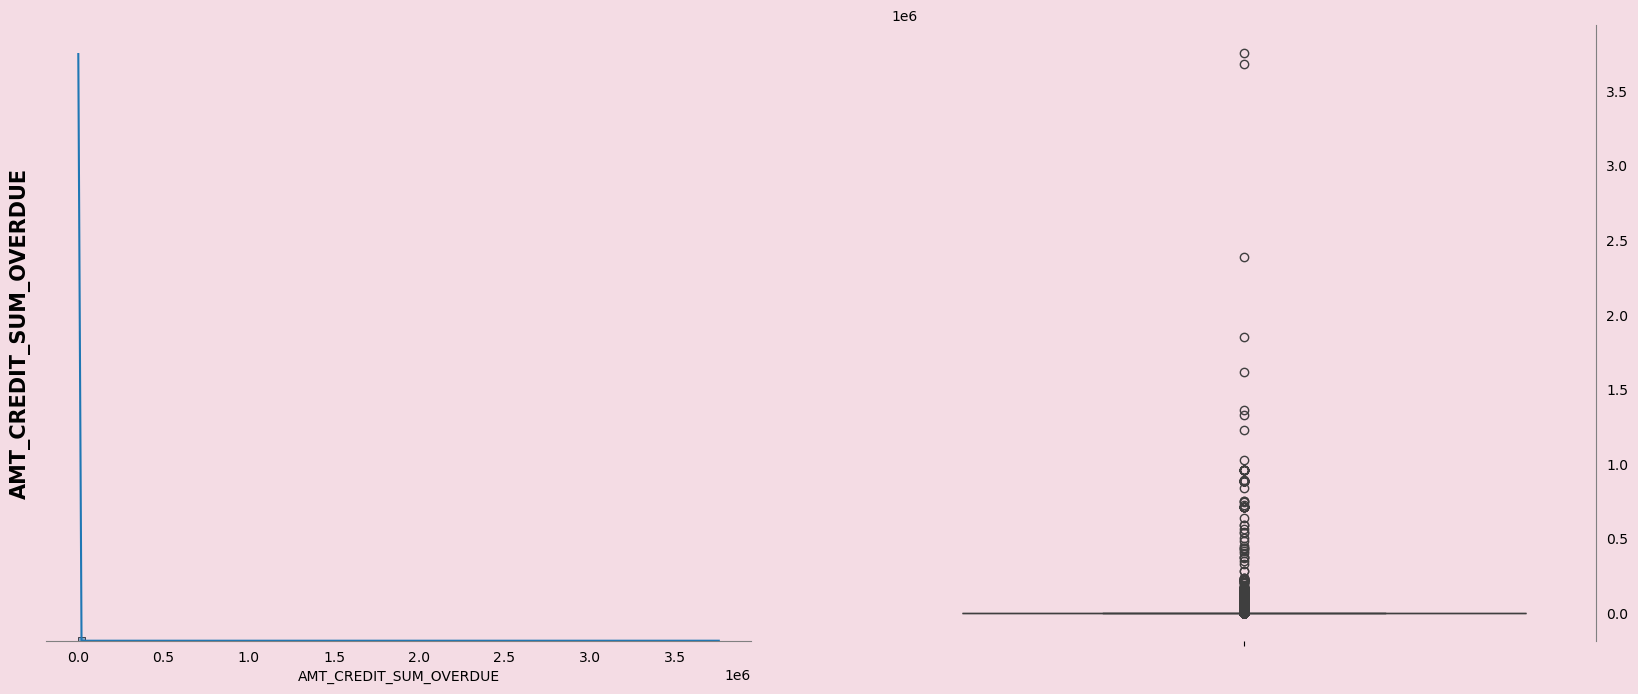

In [27]:
obj12 = Univariate_Analysis(df= merge_table, col= 'AMT_CREDIT_SUM_OVERDUE', num= True)
obj12.visualize()

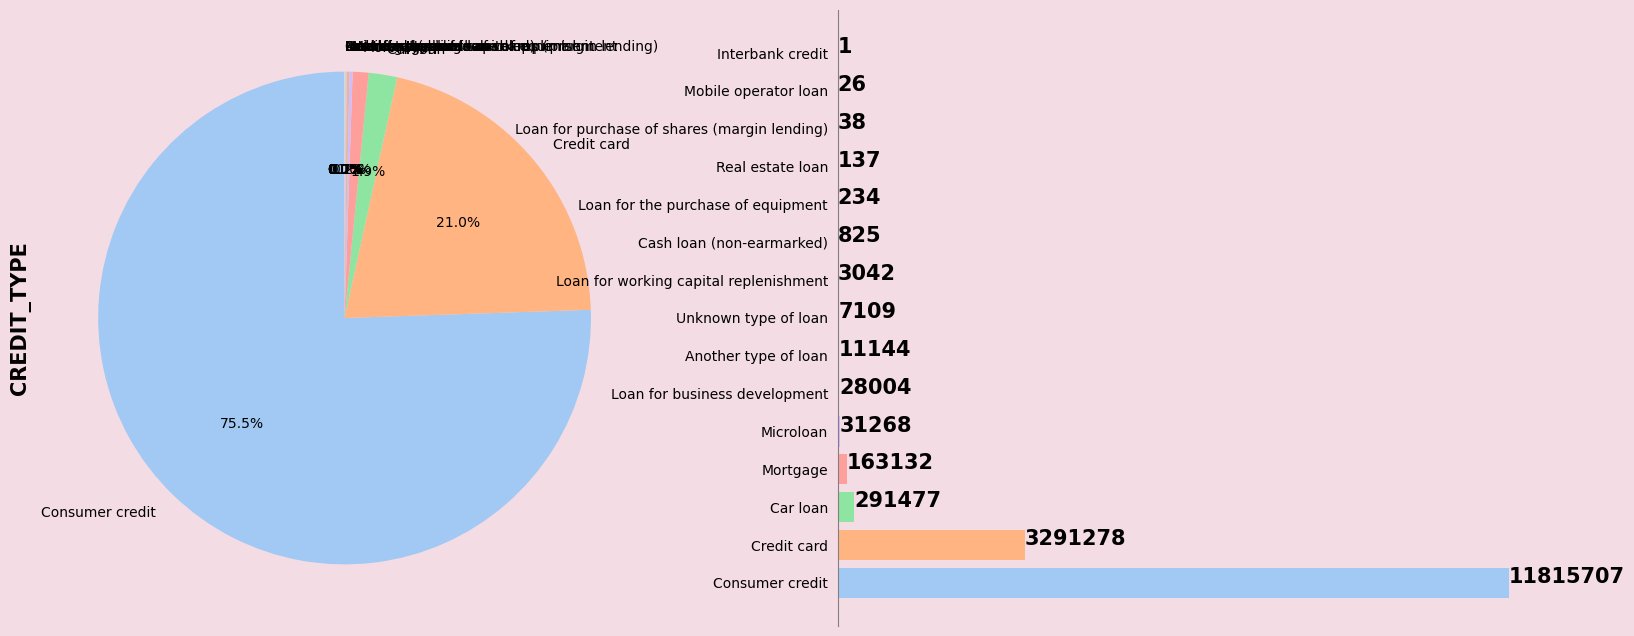

In [28]:
obj13 = Univariate_Analysis(df= merge_table, col= 'CREDIT_TYPE', num= False)
obj13.visualize()

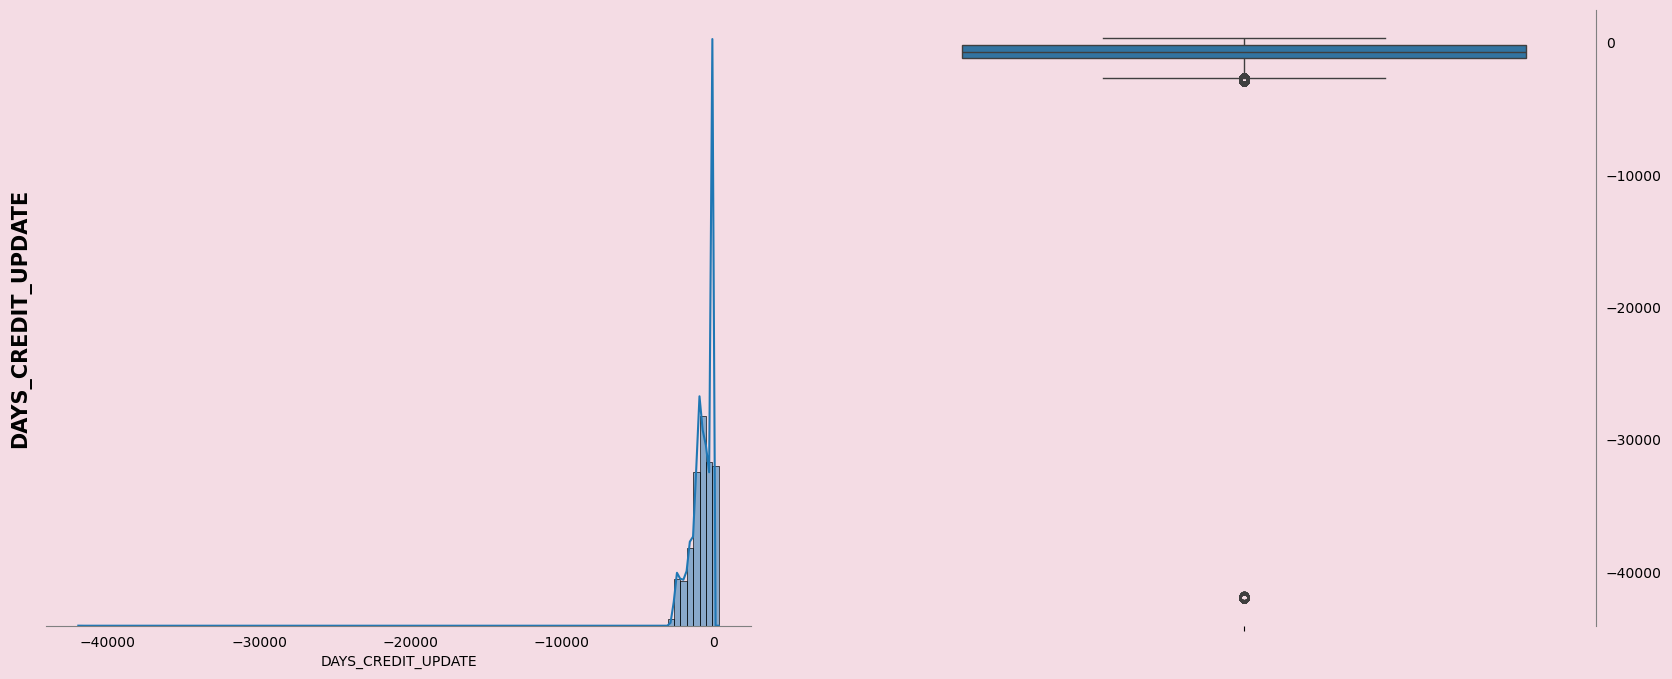

In [29]:
obj14 = Univariate_Analysis(df= merge_table, col= 'DAYS_CREDIT_UPDATE', num= True)
obj14.visualize()

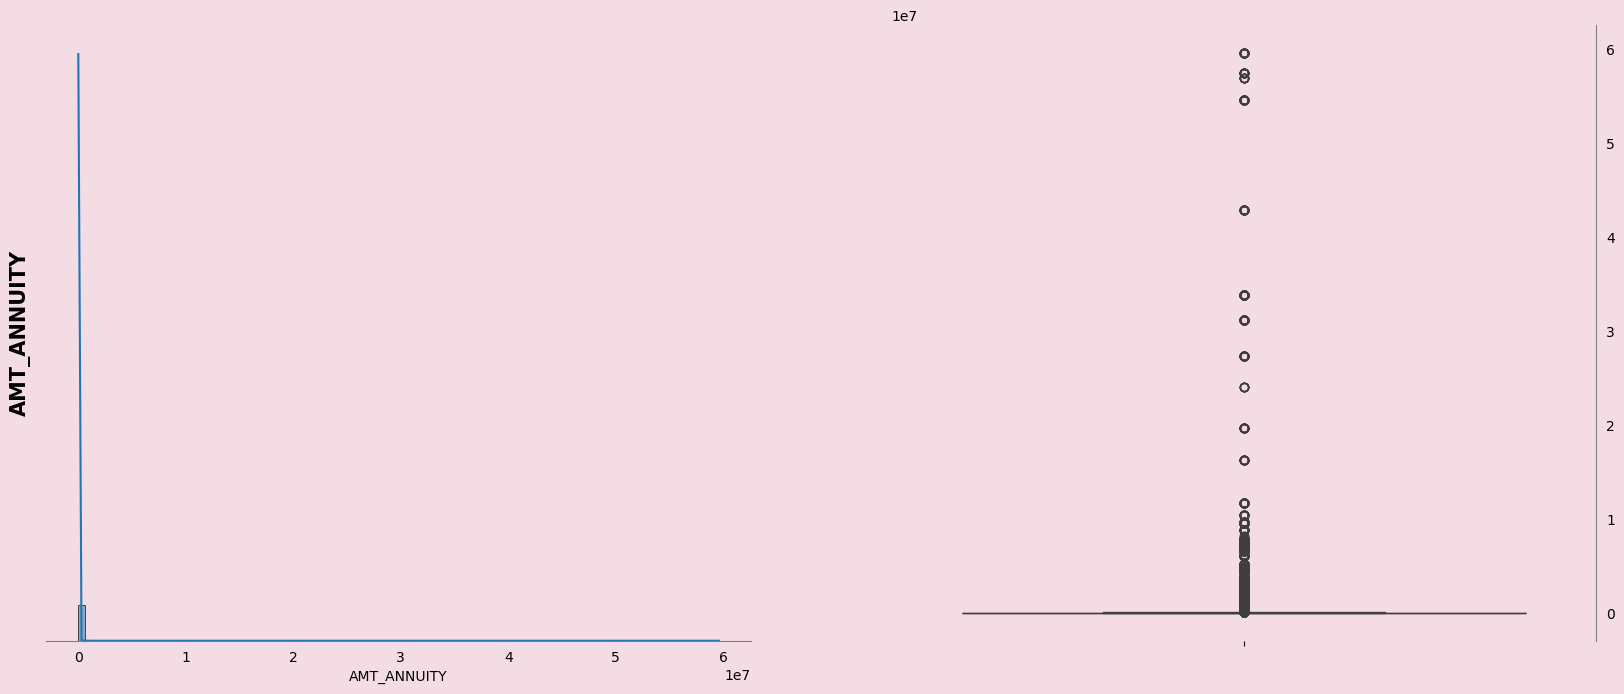

In [30]:
obj15 = Univariate_Analysis(df= merge_table, col= 'AMT_ANNUITY', num= True)
obj15.visualize()

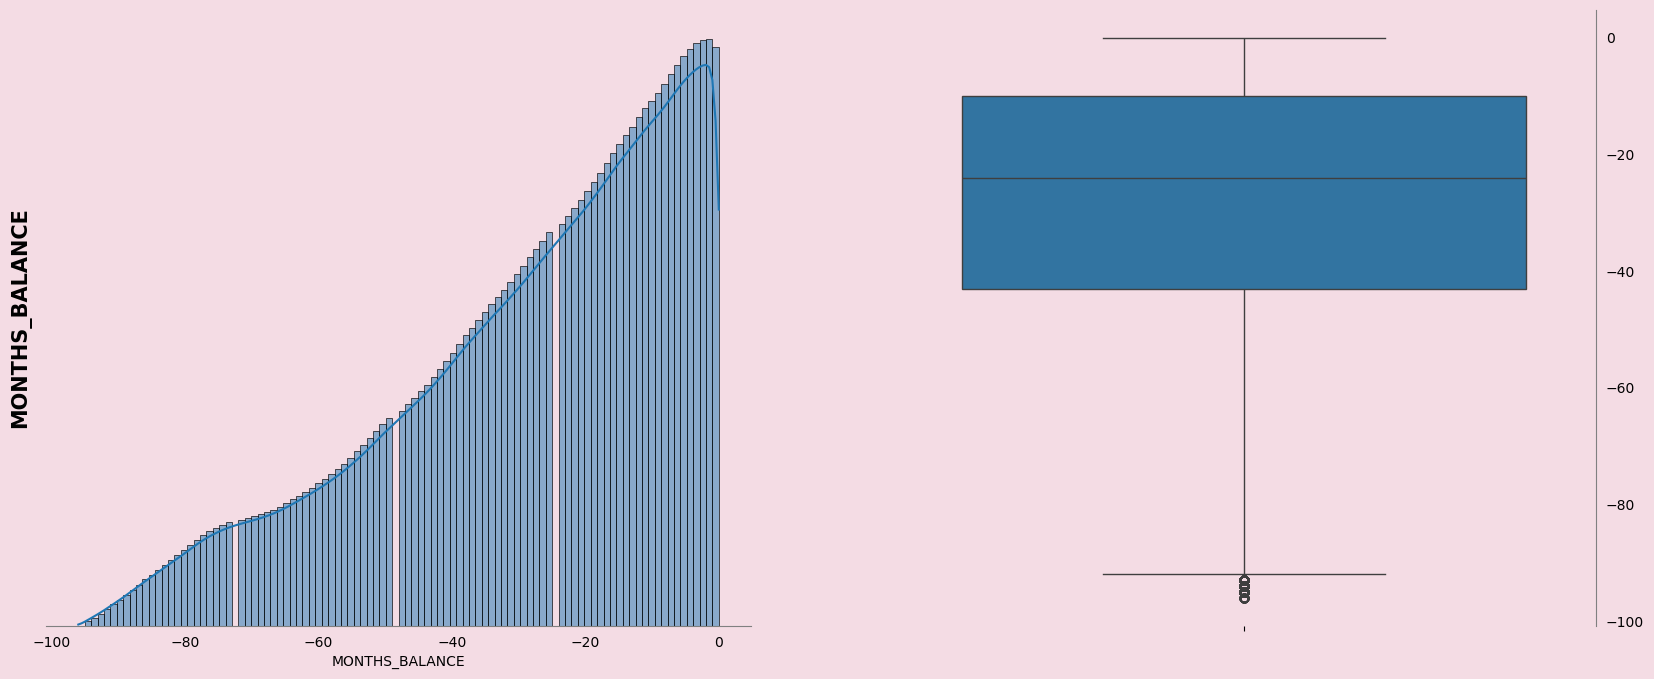

In [31]:
obj16 = Univariate_Analysis(df= merge_table, col= 'MONTHS_BALANCE', num= True)
obj16.visualize()

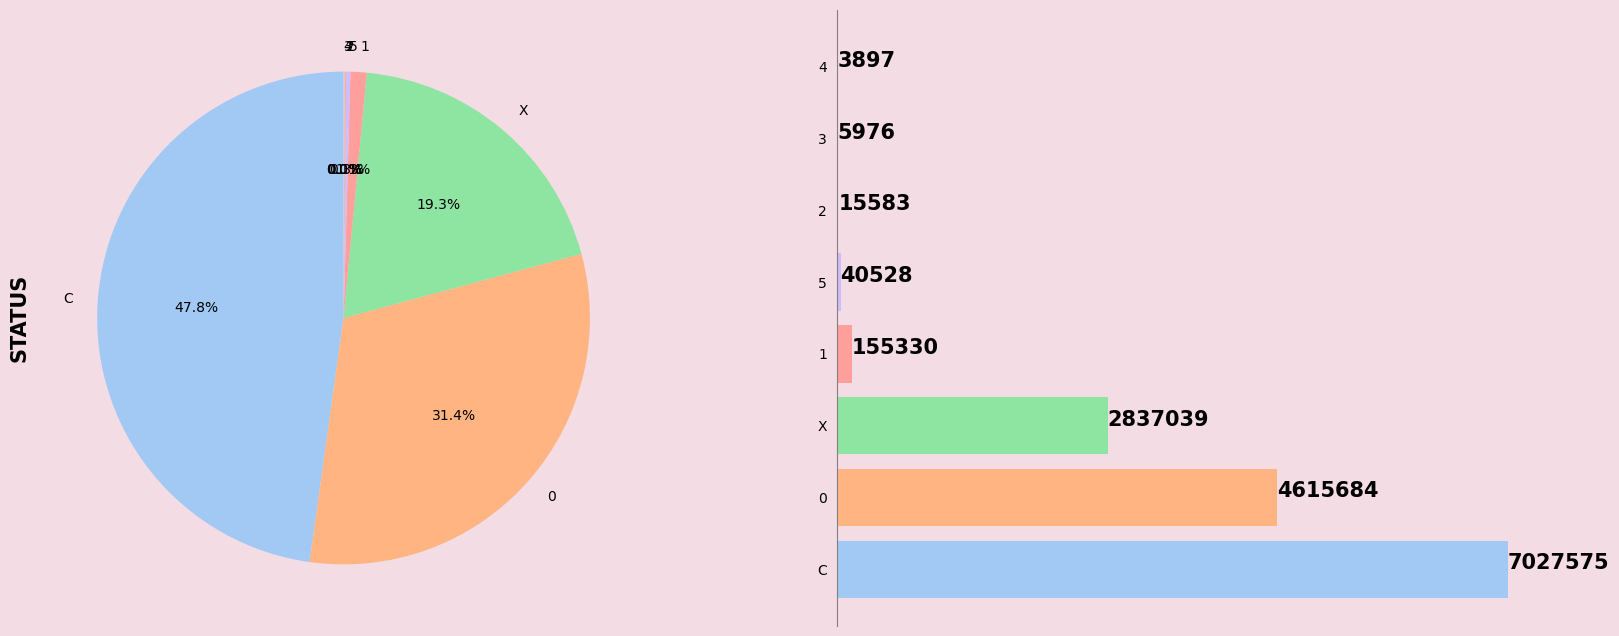

In [32]:
obj17 = Univariate_Analysis(df= merge_table, col= 'STATUS', num= False)
obj17.visualize()

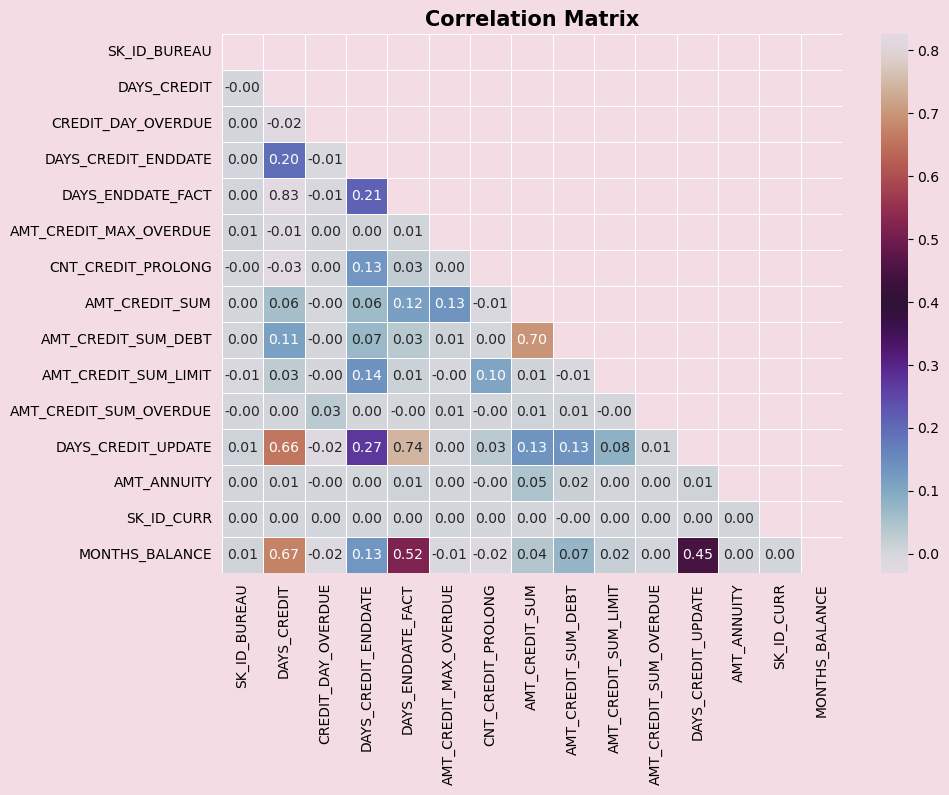

In [33]:
num = merge_check.numdf
# Correlation
draw_corr(num)

### Features that have high correlation: 
* DAYS_CREDIT_UPDATE - DAYS_ENDDATE_FACT
* AMT_CREDIT_SUM - AMT_CREDIT_SUM_DEBT

## EDA External

### Merge with TARGET table

In [34]:
df3 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")
df3.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [35]:
merge_table_target = pd.merge(df3[["SK_ID_CURR", "TARGET"]], merge_table, how='left', on=['SK_ID_CURR'])
merge_table_target.head()

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,278621,0,5885877.0,Closed,currency 1,-2586.0,0.0,-2434.0,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN,NaN,NaN
1,278621,0,5885878.0,Closed,currency 1,-1636.0,0.0,-540.0,-540.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card,-540.0,NaN,NaN,NaN
2,278621,0,5885879.0,Closed,currency 1,-775.0,0.0,-420.0,-621.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit,-550.0,NaN,NaN,NaN
3,278621,0,5885880.0,Active,currency 1,-606.0,0.0,1216.0,NaN,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card,-43.0,NaN,NaN,NaN
4,139008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of past loans per customer

In [36]:
num_past_loan_target = merge_table_target[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target.head()

,SK_ID_CURR,TARGET,num_of_past_loans
0,0,0,1
1,1,1,54
2,2,0,6
3,3,0,7
4,4,0,6


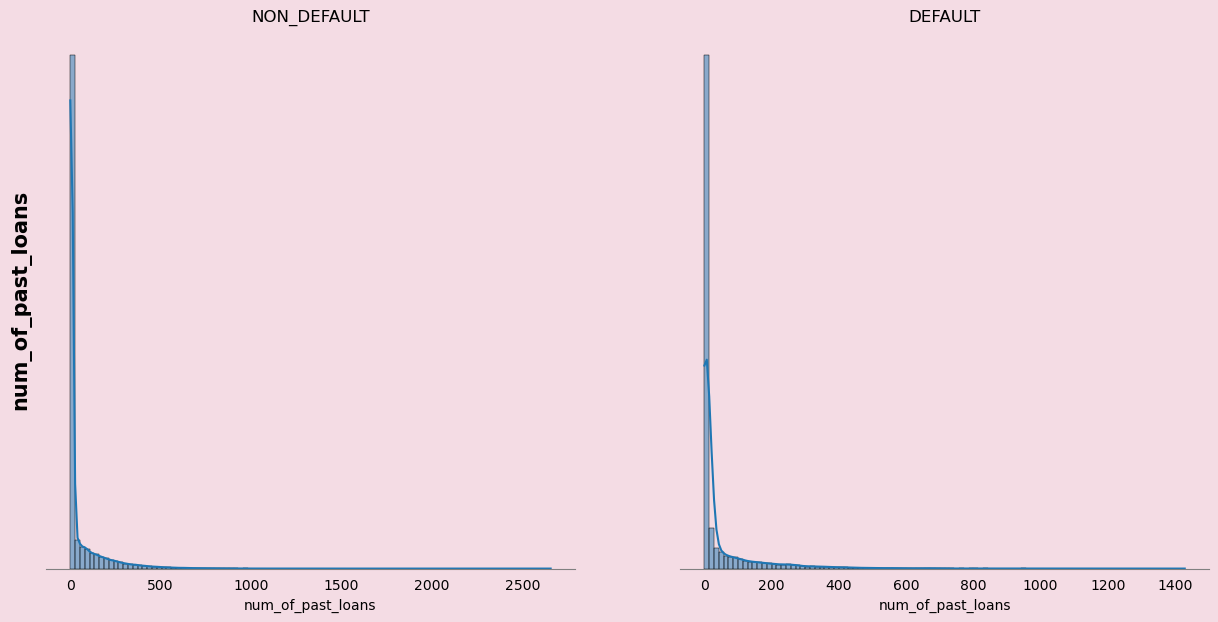

In [37]:
obj1 = Bivariate_Analysis(df = num_past_loan_target, col1= 'num_of_past_loans', num= True)
obj1.plothistogram()

### Number of types of credit per customer

In [38]:
num_of_type_target = merge_table_target[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target.head()

,SK_ID_CURR,TARGET,num_of_credit_type
0,0,0,1
1,1,1,1
2,2,0,1
3,3,0,2
4,4,0,2


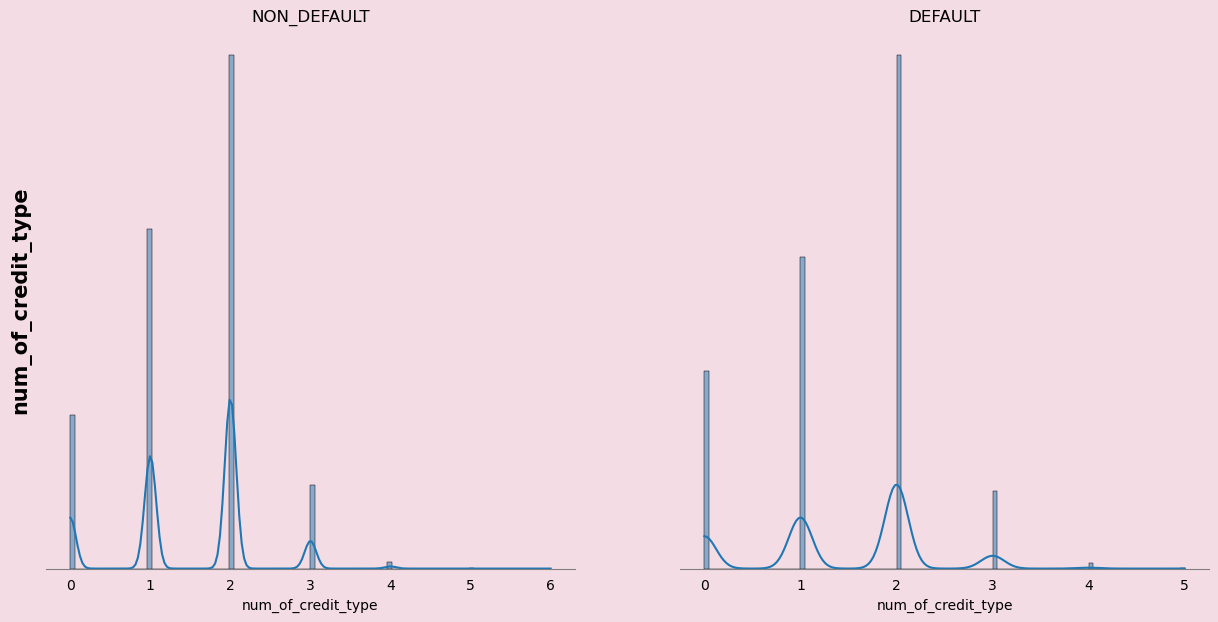

In [39]:
obj2 = Bivariate_Analysis(df = num_of_type_target, col1= 'num_of_credit_type', num= True)
obj2.plothistogram()

### The percentage of active loans per customer

In [40]:
merge_table_target['CREDIT_ACTIVE_BINARY'] = merge_table_target['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

merge_table_target['CREDIT_ACTIVE_BINARY'] = merge_table_target.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)


atv_loans_target = merge_table_target.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] = atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] * 100
atv_loans_target.head()

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,0,0,100.000000
1,1,1,100.000000
2,2,0,33.333333
3,3,0,42.857143
4,4,0,50.000000


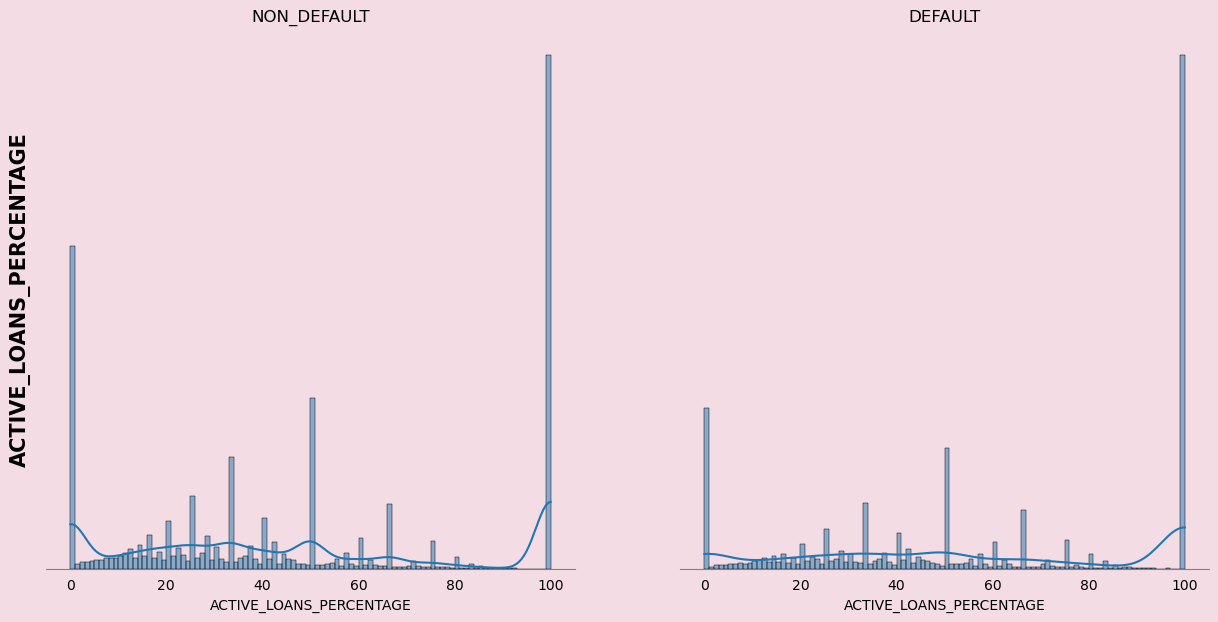

In [41]:
obj3 = Bivariate_Analysis(df = atv_loans_target, col1= 'ACTIVE_LOANS_PERCENTAGE', num= True)
obj3.plothistogram()

### The Ratio of Total Debt to Total Credit for each Customer

In [42]:
data_with_sum_debt_pos_sign = merge_table_target[merge_table_target['AMT_CREDIT_SUM_DEBT']>0]

grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = merge_table_target[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

merge_table_target = merge_table_target.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
merge_table_target = merge_table_target.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2

merge_table_target['DEBT_CREDIT_RATIO'] = (merge_table_target['TOTAL_CUSTOMER_DEBT']/merge_table_target['TOTAL_CUSTOMER_CREDIT'])*100
merge_table_target['DEBT_CREDIT_RATIO'] = merge_table_target['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del merge_table_target['TOTAL_CUSTOMER_DEBT'], merge_table_target['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = merge_table_target.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target.head()

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0,90.706731
1,1,1,NaN
2,2,0,37.908544
3,3,0,41.072109
4,4,0,44.445915


In [43]:
debt_credit_target = debt_credit_target[debt_credit_target['DEBT_CREDIT_RATIO'] <= 100]
debt_credit_target.head()

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0,90.706731
2,2,0,37.908544
3,3,0,41.072109
4,4,0,44.445915
5,6,0,25.868718


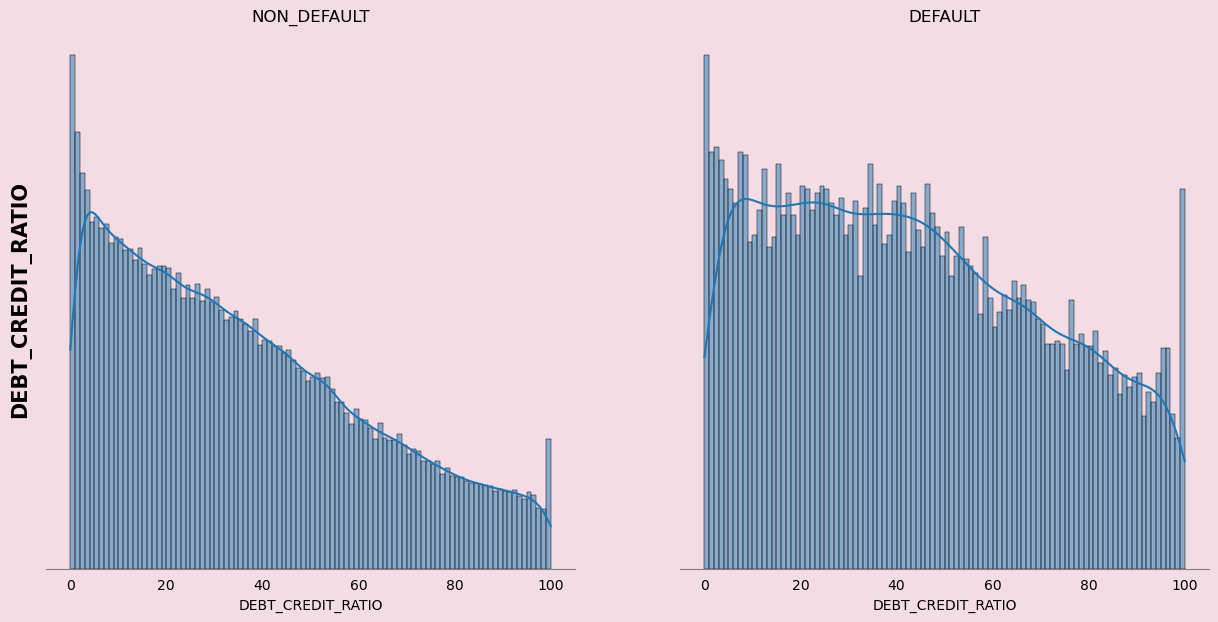

In [44]:
obj4 = Bivariate_Analysis(df = debt_credit_target, col1= 'DEBT_CREDIT_RATIO', num= True)
obj4.plothistogram()